# Predicting Survival of Titanic Passengers using Logistic Regression

# Sagar Shah
**February 5, 2020**

**Kaggle Competition | Titanic Machine Learning from Disaster**

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this contest, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

In [70]:
import os
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [71]:
#setting working directory
os.chdir('C:/Users/sagar/Documents/Jobs related/Projects/Titanic Machine Learning')

#read titanic dataset
titanic = pd.read_csv('titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [72]:
#no of passengers in titanic
print('No of Passengers ', str(len(titanic.index)))

No of Passengers  1310


## Analyzing Data

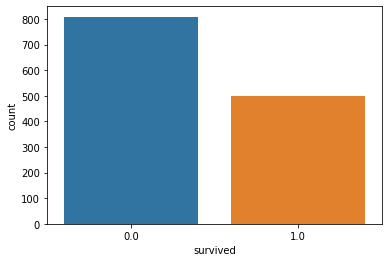

In [73]:
sns.countplot(x='survived', data=titanic)  #1 indicates the passenger has survived

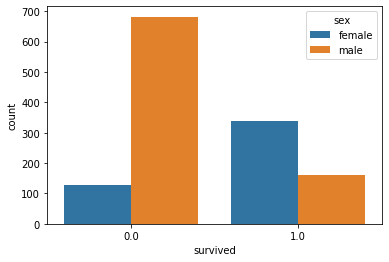

In [74]:
sns.countplot(x='survived', hue='sex', data=titanic)

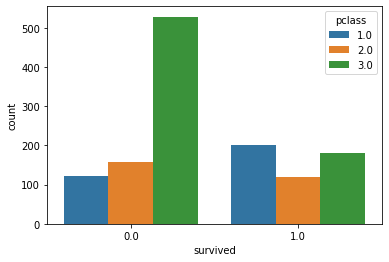

In [75]:
sns.countplot(x='survived', hue='pclass', data=titanic)

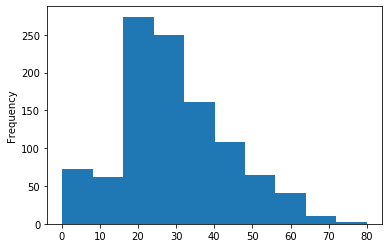

In [76]:
titanic['age'].plot.hist()

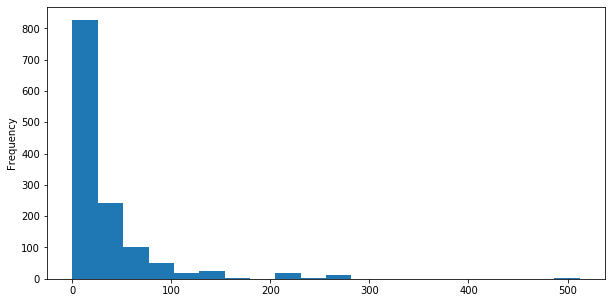

In [77]:
titanic['fare'].plot.hist(bins=20, figsize=(10,5))

titanic.info()

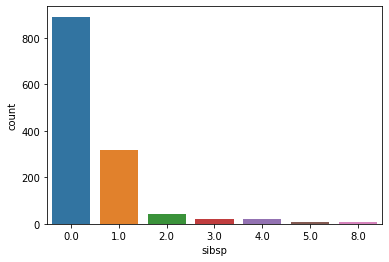

In [78]:
sns.countplot(x='sibsp', data=titanic)

# Data Wrangling

In [79]:
titanic.isnull().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [80]:
titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

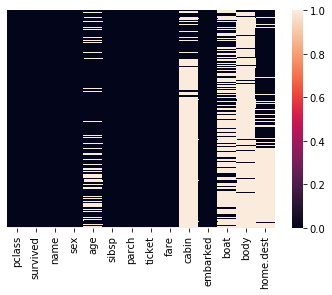

In [81]:
sns.heatmap(titanic.isnull(), yticklabels=False)

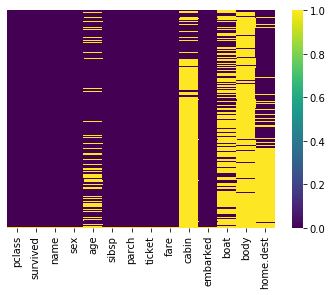

In [82]:
sns.heatmap(titanic.isnull(), yticklabels=False, cmap='viridis')  #yellow indicates null values in particular column

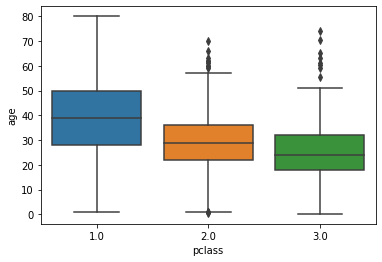

In [83]:
sns.boxplot(x='pclass', y='age', data=titanic)

In [84]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [85]:
#dropping columns with missing values - cabin, body, boat, home.dest
titanic.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [86]:
titanic.shape

(1310, 10)

In [87]:
titanic.dropna(inplace=True)
titanic.shape

(1043, 10)

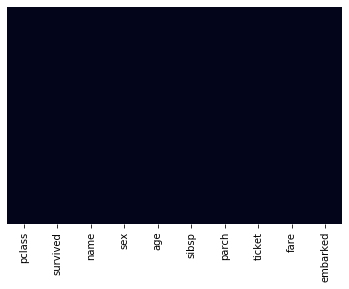

In [88]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False) #indicates no null values in the dataset now

In [89]:
titanic.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

we see a lot of string values that needs to  be converted to categorical variable/dummy variable

In [90]:
sex = pd.get_dummies(titanic['sex'], drop_first=True)
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [91]:
pcl = pd.get_dummies(titanic['pclass'], drop_first=True)
pcl.head()

,2.0,3.0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [92]:
embark = pd.get_dummies(titanic['embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [93]:
titanic = pd.concat([titanic, sex, pcl, embark], axis=1)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,2.0,3.0,Q,S
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,0,0,0,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,1,0,0,0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,0,0,0,0,1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,1,0,0,0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,0,0,0,0,1


In [94]:
titanic.drop(['name', 'sex', 'ticket', 'embarked', 'pclass'], axis=1, inplace=True)
titanic.head()

,survived,age,sibsp,parch,fare,male,2.0,3.0,Q,S
0,1.0,29.0000,0.0,0.0,211.3375,0,0,0,0,1
1,1.0,0.9167,1.0,2.0,151.5500,1,0,0,0,1
2,0.0,2.0000,1.0,2.0,151.5500,0,0,0,0,1
3,0.0,30.0000,1.0,2.0,151.5500,1,0,0,0,1
4,0.0,25.0000,1.0,2.0,151.5500,0,0,0,0,1


## Train & Test Data

In [95]:
X = titanic.drop('survived', axis=1)   #select all columns except survived since they are predictor variables
y = titanic['survived']        # y = survived is the response variable 

In [96]:
 from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [98]:
#from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [99]:
#fetching training data to logmodel
logmodel.fit(X_train, y_train)

C:\Users\sagar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#creating predictions on the basis of X_test data
predictions = logmodel.predict(X_test)

## Evaluating Model

In [101]:
#evaluating model by using classification report
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n         0.0       0.79      0.81      0.80       177\n         1.0       0.75      0.72      0.73       136\n\n    accuracy                           0.77       313\n   macro avg       0.77      0.77      0.77       313\nweighted avg       0.77      0.77      0.77       313\n'

In [102]:
#evaluating model using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)   #(144+98) - (33+38) = Accuracy of the Model

array([[144,  33],
       [ 38,  98]], dtype=int64)

In [103]:
#checking the accuracy score obtained from confusion matrix
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7731629392971247

## Thank You!!!